In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [30]:
data = pd.read_csv("housing.csv")

In [31]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [33]:
data.dropna(inplace=True)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [35]:
from sklearn.model_selection import train_test_split
X =data.drop(['median_house_value'],axis=1)
y = data["median_house_value"]

In [36]:
X.shape,y.shape

((20433, 9), (20433,))

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
train_data = X_train.join(y_train)

In [39]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((16346, 9), (4087, 9), (16346,), (4087,))

In [40]:
train_data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,<1H OCEAN,227600.0
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,INLAND,110400.0
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,INLAND,248100.0
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,<1H OCEAN,305600.0
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,NEAR OCEAN,214600.0
6823,-118.10,34.09,42.0,1460.0,289.0,829.0,273.0,4.8750,<1H OCEAN,227300.0
8384,-118.36,33.95,26.0,3231.0,1089.0,3193.0,1020.0,2.6535,<1H OCEAN,177200.0
2758,-115.49,32.67,29.0,1523.0,440.0,1302.0,393.0,1.1311,INLAND,84700.0
18143,-122.06,37.34,20.0,3435.0,593.0,1293.0,553.0,6.7578,<1H OCEAN,451400.0
15621,-122.41,37.80,52.0,2583.0,672.0,1335.0,613.0,3.1477,NEAR BAY,500001.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

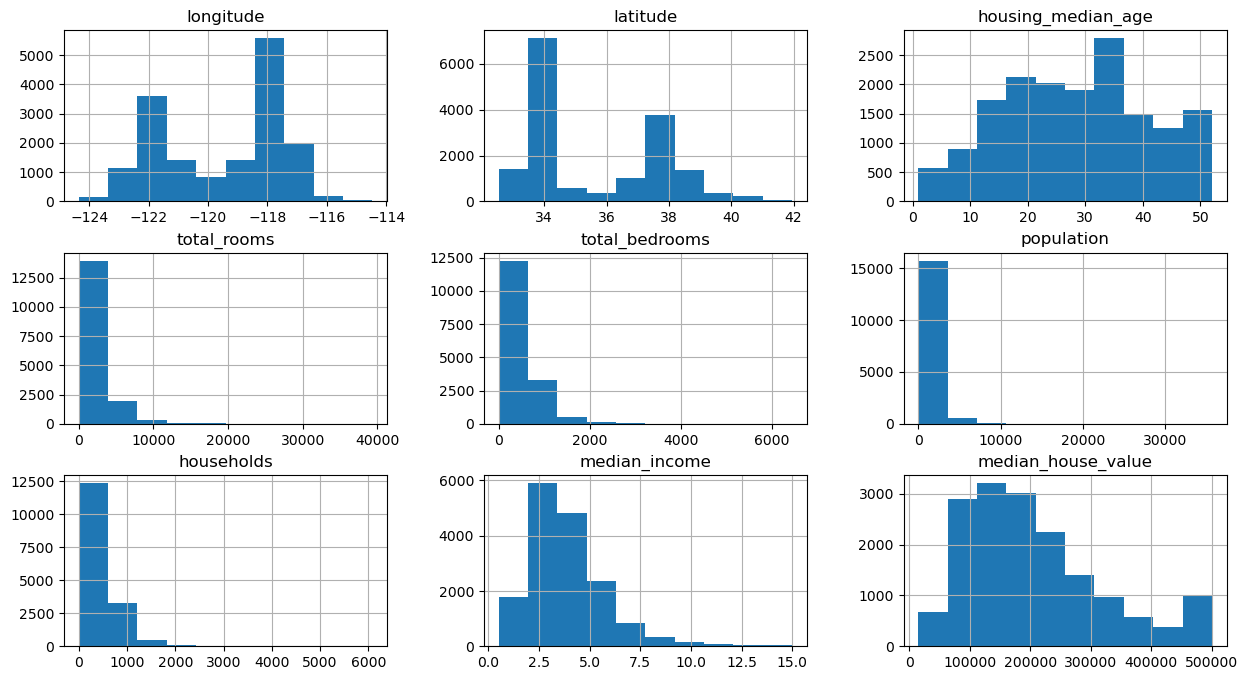

In [41]:
train_data.hist(figsize=(15,8))

In [42]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

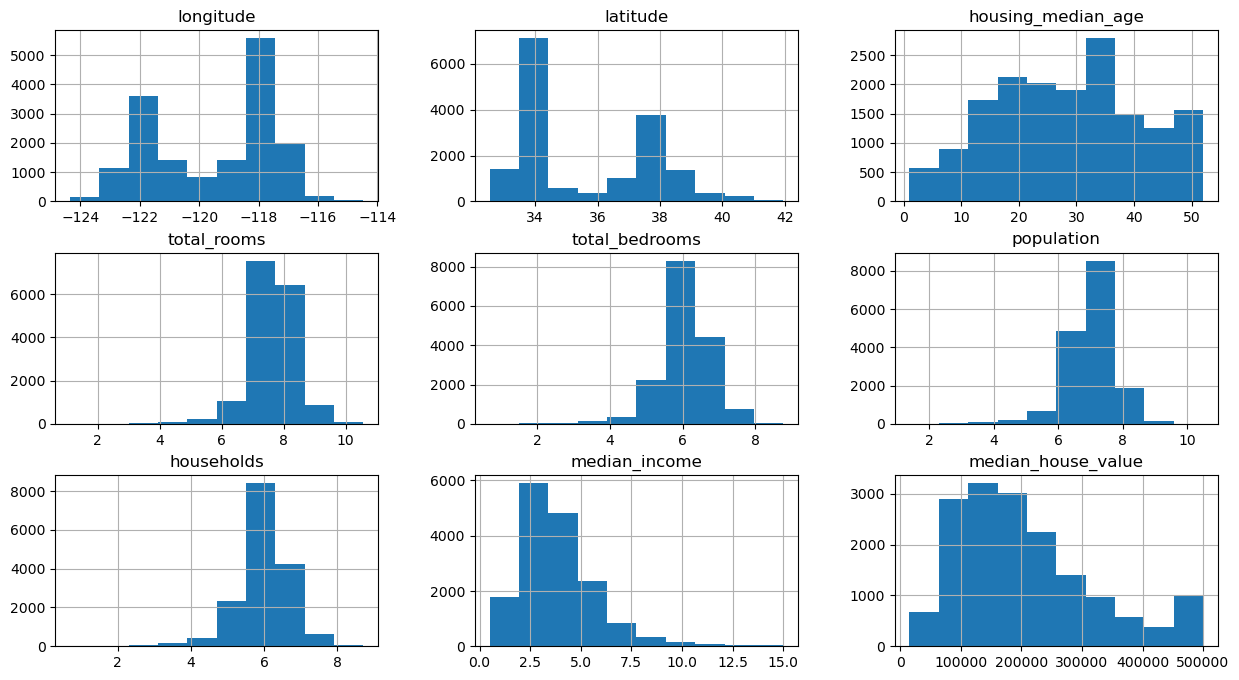

In [43]:
train_data.hist(figsize=(15,8))

In [44]:
train_data['ocean_proximity'].value_counts()

<1H OCEAN     7231
INLAND        5156
NEAR OCEAN    2114
NEAR BAY      1842
ISLAND           3
Name: ocean_proximity, dtype: int64

In [45]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

In [46]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17727,-121.80,37.32,14.0,8.392310,6.829794,7.900637,6.793466,4.7027,227600.0,1,0,0,0,0
2057,-119.63,36.64,33.0,6.944087,5.204007,6.431331,5.164786,3.4107,110400.0,0,1,0,0,0
6453,-118.06,34.12,25.0,8.266678,6.744059,7.522400,6.633318,3.6639,248100.0,0,1,0,0,0
4619,-118.31,34.07,28.0,7.767687,6.856462,7.922986,6.796824,2.2364,305600.0,1,0,0,0,0
15266,-117.27,33.04,27.0,7.517521,5.973810,7.172425,6.003887,3.5500,214600.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,8.003697,6.216606,7.271009,6.118097,5.4286,273400.0,1,0,0,0,0
12081,-117.54,33.76,5.0,8.673684,6.943122,8.089176,6.909753,4.7965,160800.0,1,0,0,0,0
5447,-118.42,34.01,42.0,7.374629,5.913503,6.859615,5.894403,3.0990,335400.0,1,0,0,0,0
866,-122.04,37.57,12.0,8.651724,6.970730,8.142354,6.964136,5.2879,231200.0,0,0,0,1,0


<Axes: >

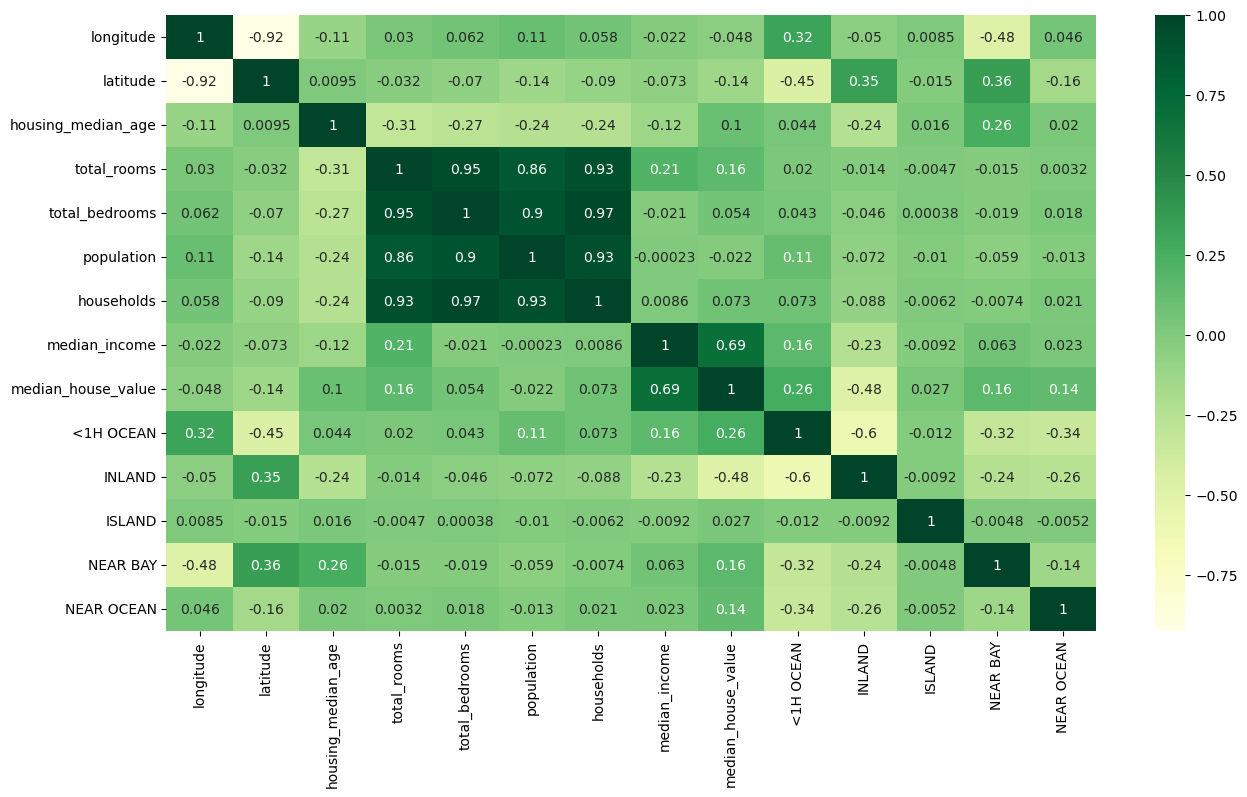

In [47]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGn")

<Axes: xlabel='latitude', ylabel='longitude'>

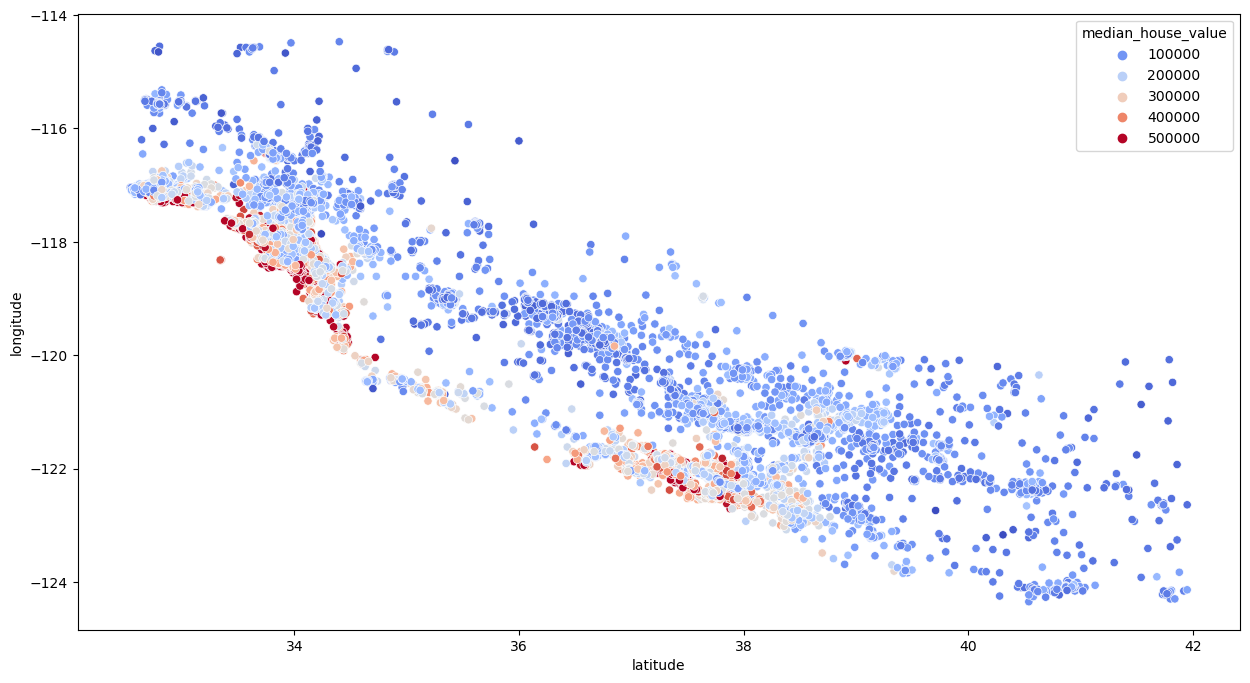

In [48]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x= 'latitude' , y ='longitude', data=train_data,hue='median_house_value',palette='coolwarm' )

In [49]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['households_rooms'] = train_data['total_rooms']/train_data['households']

<Axes: >

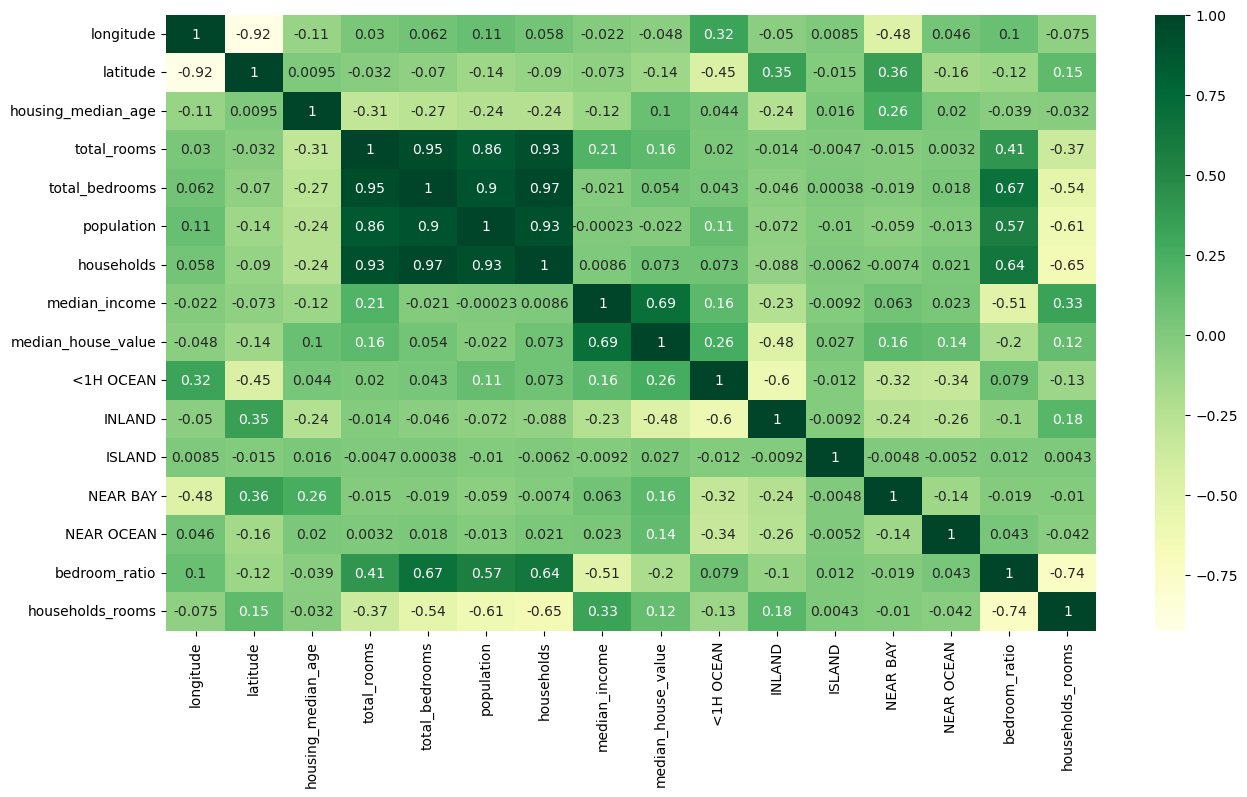

In [50]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGn")

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train, y_train = train_data.drop(['median_house_value'], axis= 1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)
reg = LinearRegression() 
reg.fit(X_train_s, y_train)
# X_train.shape, y_train.shape

LinearRegression()

In [52]:
test_data = X_test.join(y_test)
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['households_rooms'] = test_data['total_rooms']/test_data['households']
test_data.shape

(4087, 16)

In [56]:
X_test, y_test = test_data.drop(['median_house_value'], axis= 1), test_data['median_house_value']
X_test.shape, y_test.shape

((4087, 15), (4087,))

In [61]:
X_test_s = scaler.transform(X_test)

In [62]:
reg.score(X_test_s, y_test)

0.6687407117584969

In [63]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [64]:
forest.score(X_test, y_test)

0.821339430722885

In [77]:
from sklearn.model_selection import GridSearchCV
param_grid = {
	"n_estimators": [3, 10, 30],
	'max_features' : [2, 4, 6, 8],
}
grid_search = GridSearchCV(forest, param_grid, cv=5, scoring = 'neg_mean_squared_error', return_train_score = True)
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [78]:
best_forest = grid_search.best_estimator_

In [79]:
best_forest.score(X_test_s, y_test)

0.8182783737499486

In [92]:
from sklearn.neighbors import KNeighborsRegressor  
classifier= KNeighborsRegressor(n_neighbors=10, metric='minkowski', p=3 )  
classifier.fit(X_train_s, y_train)

KNeighborsRegressor(n_neighbors=10, p=3)

In [93]:
classifier.score(X_test_s, y_test)

0.7346670711319585

In [94]:
forest.predict(X_test[0:5])

array([253961.02, 149322.  , 188010.  , 144687.  , 168594.  ])

In [97]:
list(y_test[:5])

[245800.0, 137900.0, 218200.0, 220800.0, 170500.0]

In [99]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(forest, f)